import

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

## 掩護圖像生成

### 區塊切割
首先將灰階圖像由左至右由上而下掃描,分割成多個不重疊的 7 × 7 區塊

1. 將影像轉成灰階
2. 轉換成二維像素陣列
3. 分割成7 x 7大小的區塊陣列

In [5]:
# 讀取原始圖檔
img_origin = cv2.imread('../images/Lenna.jpeg')
#傳成灰階圖像
img_grayscale=cv2.cvtColor(img_origin,cv2.COLOR_BGR2GRAY) 

(225, 225)
(224, 224)


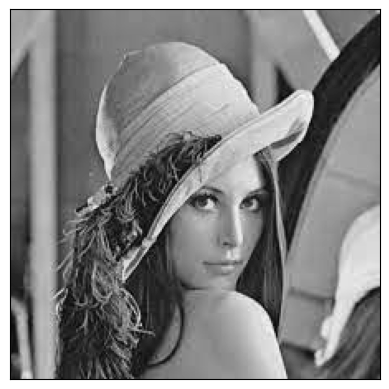

In [7]:
print(img_grayscale.shape)
img_crop = img_grayscale[:224, :224]
print(img_crop.shape)
fig = plt.figure()
plt.xticks([]), plt.yticks([])
plt.imshow(img_crop,cmap='gray')
fig.savefig('../images/lennaGrayScaleCrop.jpg')

In [8]:
def makeBlock(startx,starty,data):
    block=[]
    for i in range(7):
        block.append(data[startx+i][starty:starty+7])
    return block

In [9]:
blocks=[]
for i in range(int(img_crop.shape[0]/7)):
    for j in range(int(img_crop.shape[1]/7)):
        blocks.append(makeBlock(j*7,i*7,img_crop))
print('原圖像素: '+str(img_crop.shape))
print('切分區塊: '+str(len(blocks)))

原圖像素: (224, 224)
切分區塊: 1024


In [15]:
def showBlock(index):
    for i in blocks[index]:
        for j in i:
            print(j,end=' ')
        print()

In [16]:
showBlock(0)


158 158 158 157 157 156 156 
158 158 157 157 156 156 156 
157 157 157 157 156 156 155 
157 157 156 156 156 155 155 
156 156 156 155 155 155 154 
156 156 155 155 154 154 154 
156 155 155 155 154 154 153 


### LSB提取

1. 轉換塊像素為八位元二進制序列
2. 取得LSB
3. 儲存到LSB區塊

In [18]:
def findLSB(pixel):
    return str(bin(pixel).replace('0b','').zfill(8))

In [19]:
LSBblocks=[]
for block in blocks:
    LSBblock=[]
    for i in block:
        LSBblockrow=[]
        for j in i:
            LSBblockrow.append(int(str(findLSB(j))[7]))
        LSBblock.append(LSBblockrow)
    LSBblocks.append(LSBblock)

### 奇同位修改

1. d1⨁d2⨁d4=1 then r1=0
2. d1⨁d3⨁d4=0 then r2=1
3. d2⨁d3⨁d4=0 then r3=1

In [21]:
def XOR(a,b,c):
    string=str(a)+str(b)+str(c)
    # print('str= '+string)
    switcher = {
        '000': 0,
        '001': 1,
        '010': 1,
        '011': 0,
        '100': 1,
        '101': 0,
        '110': 0,
        '111': 1
    }
    # print(switcher.get(string, "nothing"))
    return switcher.get(string, "nothing")

In [20]:
def coverImage(index):
    print('原始區塊: ')
    for i in LSBblocks[index]:
        for j in i:
            print(str(findLSB(j))[7],end=' ')
        print()
    print('\n-----------------------------------------\n')
    print('d1⨁d2⨁d4=1,判斷: ')
    for i in LSBblocks[index]:
        # print('d1= '+str(i[2])+', d2= '+str(i[4])+', d4= '+str(i[6])+', d1⨁d2⨁d4= '+str(XOR(i[2],i[4],i[6])))
        if(int(XOR(i[2],i[4],i[6]))==1):
            i[0]=0
    for i in LSBblocks[index]:
        for j in i:
            print(str(findLSB(j))[7],end=' ')
        print()
    print('\n-----------------------------------------\n')
    print('d1⨁d3⨁d4=0,判斷: ')
    for i in LSBblocks[index]:
        # print('d1= '+str(i[2])+', d2= '+str(i[4])+', d4= '+str(i[6])+', d1⨁d2⨁d4= '+str(XOR(i[2],i[4],i[6])))
        if(int(XOR(i[2],i[5],i[6]))==0):
            i[1]=1
    for i in LSBblocks[index]:
        for j in i:
            print(str(findLSB(j))[7],end=' ')
        print()
    print('\n-----------------------------------------\n')
    print('d2⨁d3⨁d4=0,判斷: ')
    for i in LSBblocks[index]:
        # print('d1= '+str(i[2])+', d2= '+str(i[4])+', d4= '+str(i[6])+', d1⨁d2⨁d4= '+str(XOR(i[2],i[4],i[6])))
        if(int(XOR(i[4],i[5],i[6]))==0):
            i[3]=1
    for i in LSBblocks[index]:
        for j in i:
            print(str(findLSB(j))[7],end=' ')
        print()

In [22]:
for i in range(1024):
    coverImage(i)

原始區塊: 
0 0 0 1 1 0 0 
0 0 1 1 0 0 0 
1 1 1 1 0 0 1 
1 1 0 0 0 1 1 
0 0 0 1 1 1 0 
0 0 1 1 0 0 0 
0 1 1 1 0 0 1 

-----------------------------------------

d1⨁d2⨁d4=1,判斷: 
0 0 0 1 1 0 0 
0 0 1 1 0 0 0 
1 1 1 1 0 0 1 
0 1 0 0 0 1 1 
0 0 0 1 1 1 0 
0 0 1 1 0 0 0 
0 1 1 1 0 0 1 

-----------------------------------------

d1⨁d3⨁d4=0,判斷: 
0 1 0 1 1 0 0 
0 0 1 1 0 0 0 
1 1 1 1 0 0 1 
0 1 0 0 0 1 1 
0 0 0 1 1 1 0 
0 0 1 1 0 0 0 
0 1 1 1 0 0 1 

-----------------------------------------

d2⨁d3⨁d4=0,判斷: 
0 1 0 1 1 0 0 
0 0 1 1 0 0 0 
1 1 1 1 0 0 1 
0 1 0 1 0 1 1 
0 0 0 1 1 1 0 
0 0 1 1 0 0 0 
0 1 1 1 0 0 1 
原始區塊: 
1 1 1 0 0 1 1 
0 0 1 0 1 0 0 
0 0 1 0 1 0 0 
0 1 1 0 1 0 1 
1 1 0 1 0 1 1 
1 0 0 1 0 1 0 
0 0 1 0 1 0 0 

-----------------------------------------

d1⨁d2⨁d4=1,判斷: 
1 1 1 0 0 1 1 
0 0 1 0 1 0 0 
0 0 1 0 1 0 0 
0 1 1 0 1 0 1 
0 1 0 1 0 1 1 
1 0 0 1 0 1 0 
0 0 1 0 1 0 0 

-----------------------------------------

d1⨁d3⨁d4=0,判斷: 
1 1 1 0 0 1 1 
0 0 1 0 1 0 0 
0 0 1 0 1 0 0 
0 1 1 0 1 0